In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#Importing Loan Dataset
loan = pd.read_csv("loan.csv", sep=",", encoding = "ISO-8859-1")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
#Checking dimension of the data
loan.shape

(39717, 111)

In [4]:
#Finding the columns where all records are null.
loan_drop = loan[[x for x in loan if loan[x].isnull().sum() == 39717]]
loan_drop

,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Removing columns where the columns are null
loan = loan.drop( loan_drop.columns, axis = 1 )
loan.shape
#We didn't consider "Current" loan status since it contains running loans and there might be or might not be chance of default

(39717, 57)

In [6]:
#Checking unique values for term
loan['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [7]:
#Checking which columns consists of null values
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [8]:
#Checking reason for next_pymnt_d null values
loan[['loan_status', 'next_pymnt_d']].groupby('loan_status').count()
#Only loans which are current has this dates filled

,next_pymnt_d
loan_status,
Charged Off,0
Current,1140
Fully Paid,0


In [9]:
#Droping all rows which have Loan_status as Current
loan = loan[loan.loan_status != 'Current']
loan.shape

(38577, 57)

In [10]:
#Checking which columns consists of null values
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2386
emp_length                     1033
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12527
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [11]:
#Checking out_prncp unique values 
loan['out_prncp'].unique()

array([0.])

In [12]:
#Checking out_prncp unique values 
loan['out_prncp_inv'].unique()

array([0.])

In [13]:
#Checking collections_12_mths_ex_med unique values 
loan['collections_12_mths_ex_med'].unique()

array([ 0., nan])

In [14]:
#Checking policy_code unique values 
loan['policy_code'].unique()

array([1], dtype=int64)

In [15]:
#Checking application_type unique values 
loan['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [16]:
#Checking acc_now_delinq unique values 
loan['acc_now_delinq'].unique()

array([0], dtype=int64)

In [17]:
#Checking delinq_amnt unique values 
loan['delinq_amnt'].unique()


array([0], dtype=int64)

In [18]:
#Checking pub_rec_bankruptcies unique values 
loan['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [19]:
#Checking pub_rec_bankruptcies unique values 
loan['tax_liens'].unique()

array([ 0., nan])

In [20]:
#Removing all columns which are Customer behavioural variables and which has initial or single value
loan = loan.drop(['mths_since_last_delinq', 'delinq_amnt', 'delinq_2yrs', 'mths_since_last_record','revol_bal', 'revol_util',
'out_prncp','out_prncp_inv','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med',
'policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt', 'tax_liens' ], axis = 1 )
loan.shape

(38577, 39)

In [21]:
#Checking which columns consists of null values
loan.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2386
emp_length                  1033
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
desc                       12527
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
total_acc                      0
initial_li

In [22]:
#Checking percentage of null values
loan.isnull().sum()*100/loan.shape[0]

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.185033
emp_length                  2.677761
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
pymnt_plan                  0.000000
url                         0.000000
desc                       32.472717
purpose                     0.000000
title                       0.028514
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
o

In [23]:
#Replacing all emp_title with the mode of emp_title
loan['emp_title'].fillna(loan['emp_title'].mode()[0], inplace=True)

In [24]:
#Checking percentage of null values
loan.isnull().sum()*100/loan.shape[0]

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   0.000000
emp_length                  2.677761
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
pymnt_plan                  0.000000
url                         0.000000
desc                       32.472717
purpose                     0.000000
title                       0.028514
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
o

In [25]:
#Created a new derived variable for emp_length to get the int type of value 
#Picked only the integers from the column
loan['emp_length'] = loan.emp_length.str.extract('(\d+)')

In [26]:
#Checking for intial value
loan['emp_length'].unique()

array(['10', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [27]:
#Replacing Nan values with zero as the data type is object
loan['emp_length'].fillna(0, inplace=True)
loan['emp_length'] = loan['emp_length'].astype(int)
#Replaced all the 0 values with mean value
loan['emp_length'] = loan['emp_length'].mask(loan['emp_length']==0).fillna(round(loan['emp_length'].mean())).astype(int)
loan['emp_length'].unique()

array([10,  1,  3,  8,  9,  4,  5,  6,  2,  7], dtype=int64)

In [28]:
#Checking percentage of null values
loan.isnull().sum()*100/loan.shape[0]

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   0.000000
emp_length                  0.000000
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
pymnt_plan                  0.000000
url                         0.000000
desc                       32.472717
purpose                     0.000000
title                       0.028514
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
o

In [29]:
#Checking for the intial values in funded_amnt_inv 
loan[loan.funded_amnt_inv == 0].count()

id                         129
member_id                  129
loan_amnt                  129
funded_amnt                129
funded_amnt_inv            129
term                       129
int_rate                   129
installment                129
grade                      129
sub_grade                  129
emp_title                  129
emp_length                 129
home_ownership             129
annual_inc                 129
verification_status        129
issue_d                    129
loan_status                129
pymnt_plan                 129
url                        129
desc                       129
purpose                    129
title                      129
zip_code                   129
addr_state                 129
dti                        129
earliest_cr_line           129
inq_last_6mths             129
open_acc                   129
pub_rec                    129
total_acc                  129
initial_list_status        129
total_pymnt                129
total_py

In [30]:
#filling values for fully paid from the total_rec_prncp and for charged of count 27 values assumed funded_amnt as the value
loan['funded_amnt_inv'] = loan.apply(lambda row : ( row['total_rec_prncp'] if row['loan_status'] == 'Fully Paid' else row['funded_amnt'] ) if row['funded_amnt_inv'] == 0  else row['funded_amnt_inv'], axis = 1 )
loan[loan.funded_amnt_inv == 0].count()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
desc                       0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
total_acc                  0
initial_list_status        0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int 

In [31]:
#Checking for the initial value
loan[loan.int_rate == 0]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies


In [32]:
#Deriving a column loan issue_year from issue_d
loan['issue_year'] = loan['issue_d'].apply(lambda x: x.split('-')[1]).astype(int)
loan['issue_year'].unique()

array([11, 10,  9,  8,  7], dtype=int64)

In [33]:
#creating a derived column from term to remove months
loan['term_months'] = loan['term'].apply(lambda x: x.split(' ')[1]).astype(int)
loan['term_months'].unique()

array([36, 60], dtype=int64)

In [34]:
#Removing % symbol from int_rate and converting the column to float
loan['int_rate_val'] = loan['int_rate'].apply(lambda x: x.split('%')[0]).astype(float)
#Creating a derived field as interest bin to from interest rate
loan['interest_bin'] = pd.cut(loan['int_rate_val'], [0,5,10,15,20,25], labels=['0-5', '5-10', '10-15', '15-20','20-25'])
loan['interest_bin']

0        10-15
1        15-20
2        15-20
3        10-15
5         5-10
6        15-20
7        15-20
8        20-25
9        10-15
10       10-15
11       10-15
12       10-15
13        5-10
14       10-15
15       15-20
16       15-20
17        5-10
18       10-15
19        5-10
20       15-20
21       10-15
22       10-15
23       10-15
24       10-15
25        5-10
26       10-15
27       15-20
28       10-15
29       10-15
30        5-10
31        5-10
33        5-10
34       15-20
35       10-15
36        5-10
37        5-10
38       10-15
40        5-10
41        5-10
42       15-20
43       15-20
44        5-10
45        5-10
46        5-10
47       10-15
48        5-10
49        5-10
50        5-10
51        5-10
52       10-15
53       15-20
54        5-10
55       15-20
56       15-20
57       10-15
58       10-15
59       15-20
60       10-15
61       15-20
62       10-15
63       15-20
64       10-15
65       10-15
66       15-20
67       10-15
68       20-25
69       1

In [35]:
#Derived variable for loan_status to Mark Full Paid O and Charged Off as 1
loan['loan_status_binary'] = loan['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1).astype(int)

In [36]:
#Changing the data type of funded_amnt_inv
loan['funded_amnt_inv'] = loan['funded_amnt_inv'].astype(int)

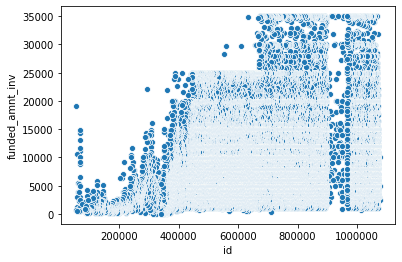

In [37]:
#Checking for Outliers in funded_amnt_inv
sns.scatterplot(loan['id'],loan['funded_amnt_inv'])
#As these are closely distributed ignoring the outliers

In [38]:
#Converting the emp_title to upper case
loan['emp_title'] = loan['emp_title'].str.upper()

In [39]:
#Converting the zip code to only numeric
#Picked only the integers from the column
loan['zip_code'] = loan.zip_code.str.extract('(\d+)').astype(int)

In [40]:
#Cleaning pub_rec_bankruptcies
loan['pub_rec_bankruptcies'].fillna(loan['pub_rec_bankruptcies'].median(), inplace=True)

##### DATA ANALYSIS

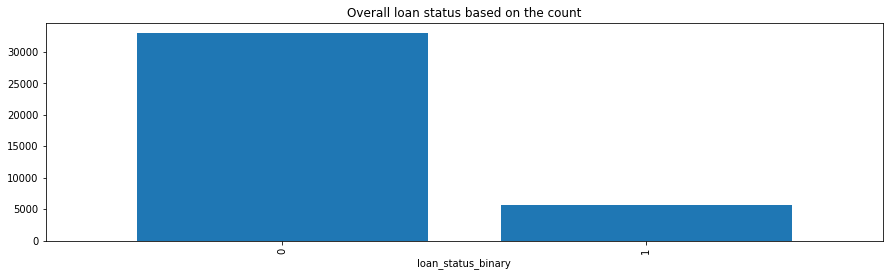

In [41]:
#Checking the Status of Loan_status with number of issued.
df=loan.groupby(['loan_status_binary']).size()
plt.title('Overall loan status based on the count')
ax = df.plot(kind='bar',figsize=(15,4),width = 0.8,edgecolor=None)
#By the below observation we can see that mostly loans are fully paid

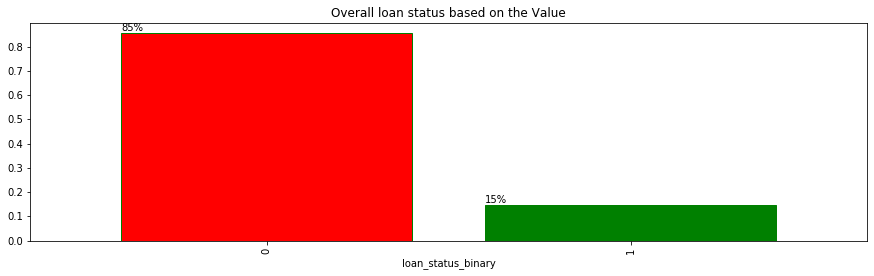

In [42]:
#default rate on overall issued loans.
df=loan.groupby(['loan_status_binary']).size()
ax = (df.div(df.sum(0), axis=0)).plot(kind='bar',figsize=(15,4),width = 0.8,color=['red', 'green', 'blue', 'cyan'],edgecolor= 'green')
plt.title('Overall loan status based on the Value')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
#Note:Percentage above the bar is the default rate
#From below we can see default rate is around 15% for overall issued loans

In [43]:
#Checking correlation between loan_amnt,funded_amnt and funded_amnt_inv 
loan[['loan_amnt','funded_amnt', 'funded_amnt_inv']].corr()
#With the below analysis we can assume that Applicant is getting near to the amount he requested for

,loan_amnt,funded_amnt,funded_amnt_inv
loan_amnt,1.000000,0.981790,0.939091
funded_amnt,0.981790,1.000000,0.957145
funded_amnt_inv,0.939091,0.957145,1.000000


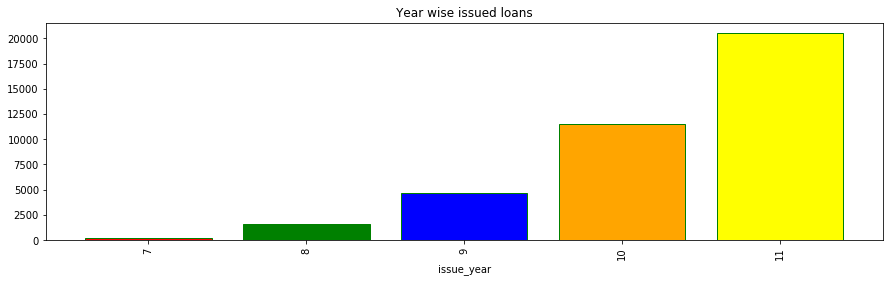

In [44]:
#bar plot to show in which year the maximum loan issued
df=loan.groupby(['issue_year']).size()
plt.title('Year wise issued loans')
ax = df.plot(kind='bar',figsize=(15,4),width = 0.8,color=['red', 'green', 'blue','orange','yellow'],edgecolor= 'green')
#By the below observation we can clearly see that the more loans were issued in 2011

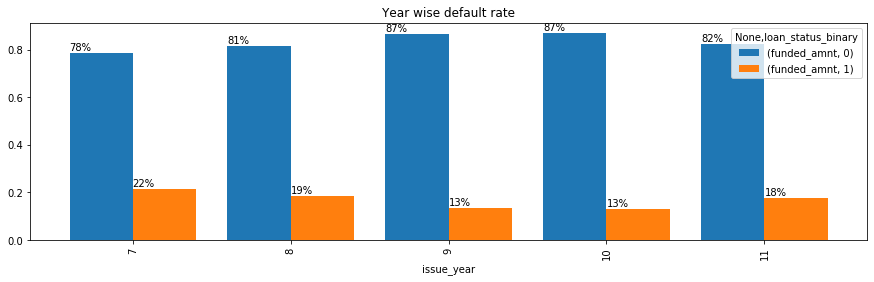

In [45]:
#bar plot to show in which year the default rate was high
df=loan.groupby(['issue_year', 'loan_status_binary'])[['funded_amnt']].sum()
df=df.unstack()
ax = (df.div(df.sum(1), axis=0)).plot(kind='bar',figsize=(15,4),width = 0.8,edgecolor=None)
plt.title('Year wise default rate')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

#Note:Percentage on the bar shows the default rate 
#By the below observation we have seen that 2007 has highest default rate.
#Default rate = Total charged off / (Total charged off + total fully paid)

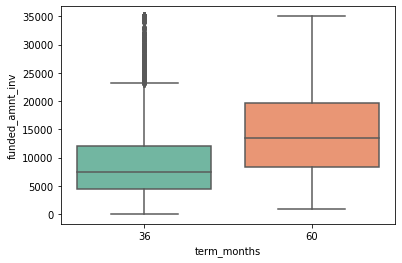

In [46]:
#Which term is having more funded_amt ?
sns.boxplot(x="term_months", y="funded_amnt_inv", data=loan, palette="Set2" )
#With below observation we can see 60 Months has Loans with high funding amount range which lies between 10000 to 15000 usd

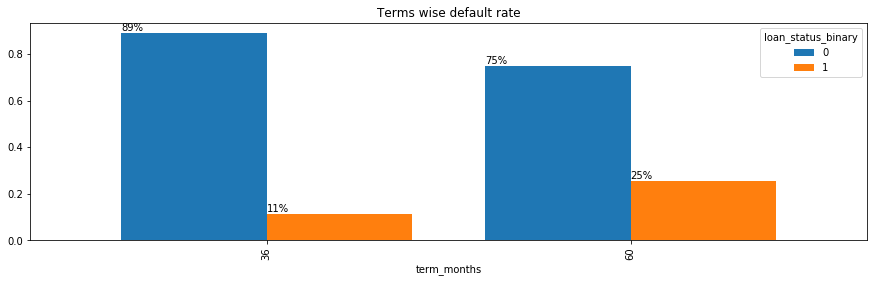

In [47]:
#Default rate in term 
df=loan.groupby(['term_months', 'loan_status_binary']).size()
df=df.unstack()
ax = (df.div(df.sum(1), axis=0)).plot(kind='bar',figsize=(15,4),width = 0.8,edgecolor=None)
plt.title('Terms wise default rate')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
#Note:The Percentage above the bar shows the default rate
#By the below obserbvation we can see that the default rate is high in 60 months term.

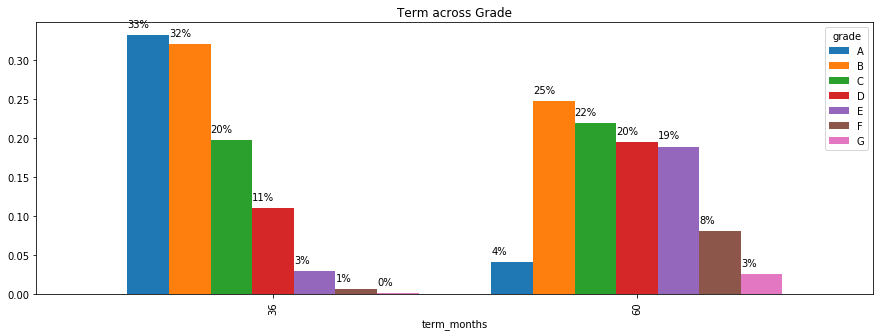

In [48]:
#Analysis on term for high default rate 
df=loan.groupby(['term_months','grade']).size()
df=df.unstack()
ax = (df.div(df.sum(1), axis=0)).plot(kind='bar',figsize=(15,5),width = 0.8,edgecolor=None)
plt.title('Term across Grade')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
#By the below observation we can see 60 months is having more of lower grades

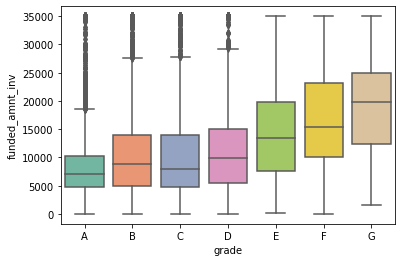

In [49]:
#What is the range of funded_amnt_inv with respect to grade?
sns.boxplot(x="grade", y="funded_amnt_inv", data=loan.sort_values('grade'), palette="Set2" )
#By the below observations we can see that the lower grade is having most of the funded_amnt_inv in high ranges

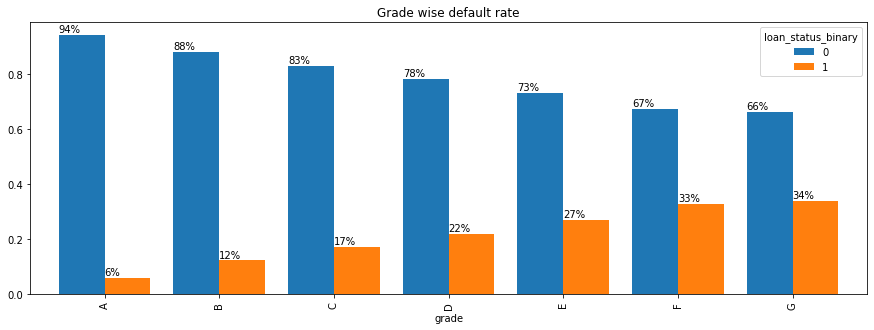

In [50]:
#grade wise default rates
df=loan.groupby(['grade','loan_status_binary']).size()
df=df.unstack()
ax = (df.div(df.sum(1), axis=0)).plot(kind='bar',figsize=(15,5),width = 0.8,edgecolor=None)
plt.title('Grade wise default rate')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
#Note:The Percentage above the bar shows the default rate
#for the below we can observe that as the grade increases there is a increase in default rate

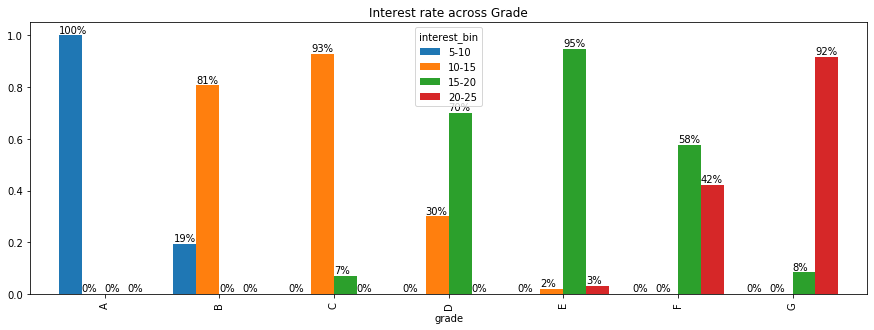

In [51]:
#Grade wise intrest rate ranges
df=loan.groupby(['grade','interest_bin']).size()
df=df.unstack()
ax = (df.div(df.sum(1), axis=0)).plot(kind='bar',figsize=(15,5),width = 0.8,edgecolor=None)
plt.title('Interest rate across Grade')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
# As the grade decreases there is a increase in the intrest rate.

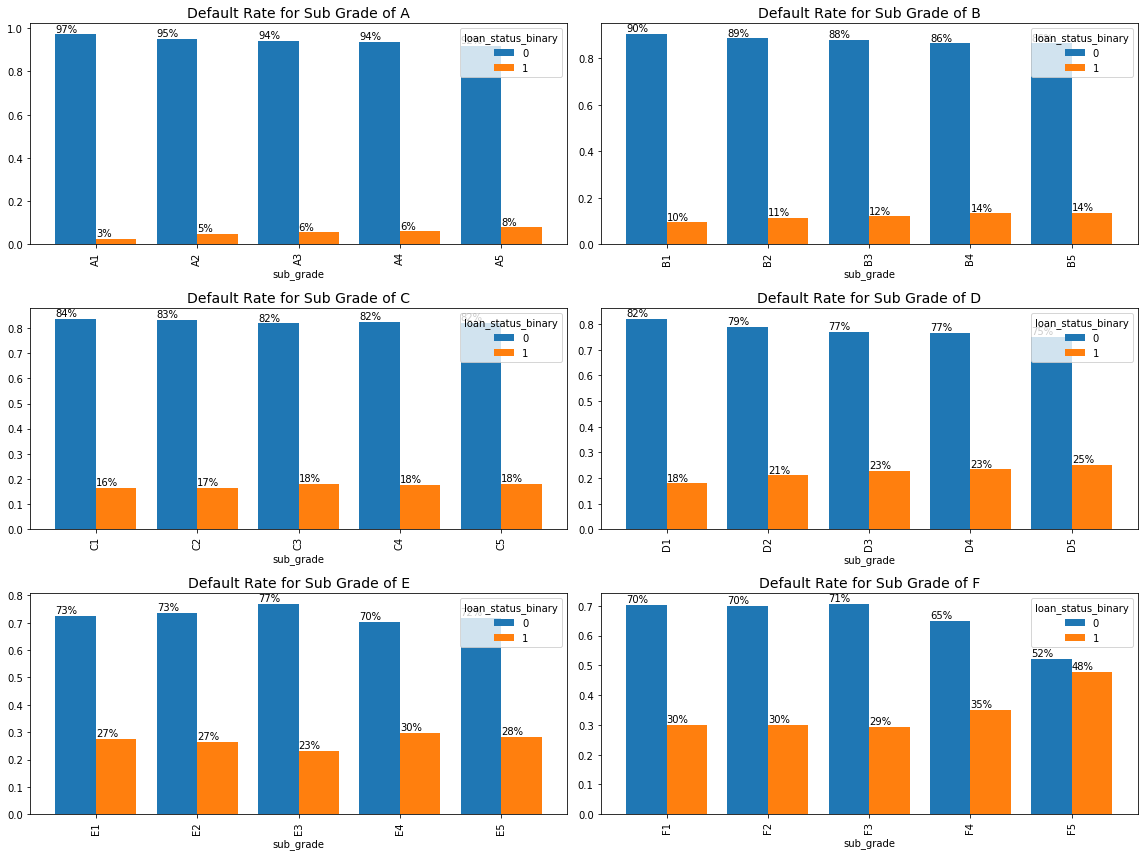

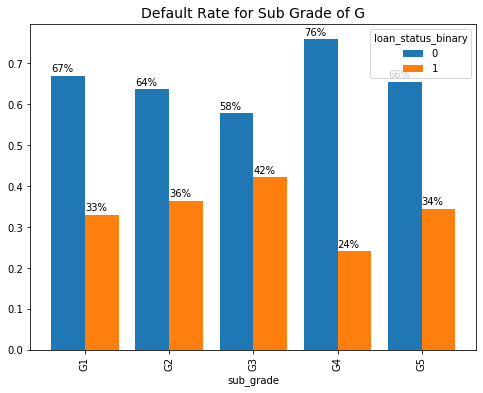

In [52]:
#### Sub Grade wise intrest rate ranges
f,((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2)

df=loan[loan.grade == 'A'].groupby(['sub_grade','loan_status_binary']).size()
df=df.unstack()
ax = (df.div(df.sum(1), axis=0)).plot(kind='bar', ax=ax1, figsize=(16,12),width = 0.8,edgecolor=None)
ax1.set_title('Default Rate for Sub Grade of A', fontsize=14)
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
    
df=loan[loan.grade == 'B'].groupby(['sub_grade','loan_status_binary']).size()
df=df.unstack()
ax = (df.div(df.sum(1), axis=0)).plot(kind='bar',ax=ax2, figsize=(16,12),width = 0.8,edgecolor=None)
ax2.set_title('Default Rate for Sub Grade of B', fontsize=14)
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
    
df=loan[loan.grade == 'C'].groupby(['sub_grade','loan_status_binary']).size()
df=df.unstack()
ax = (df.div(df.sum(1), axis=0)).plot(kind='bar',ax=ax3, figsize=(16,11),width = 0.8,edgecolor=None)
ax3.set_title('Default Rate for Sub Grade of C', fontsize=14)
for p in ax3.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
    
df=loan[loan.grade == 'D'].groupby(['sub_grade','loan_status_binary']).size()
df=df.unstack()
ax = (df.div(df.sum(1), axis=0)).plot(kind='bar',ax=ax4, figsize=(16,12),width = 0.8,edgecolor=None)
ax4.set_title('Default Rate for Sub Grade of D', fontsize=14)
for p in ax4.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))


df=loan[loan.grade == 'E'].groupby(['sub_grade','loan_status_binary']).size()
df=df.unstack()
ax =(df.div(df.sum(1), axis=0)).plot(kind='bar',ax=ax5, figsize=(16,12),width = 0.8,edgecolor=None)
ax5.set_title('Default Rate for Sub Grade of E', fontsize=14)
for p in ax5.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
    
    
df=loan[loan.grade == 'F'].groupby(['sub_grade','loan_status_binary']).size()
df=df.unstack()
ax = (df.div(df.sum(1), axis=0)).plot(kind='bar',ax=ax6, figsize=(16,12),width = 0.8,edgecolor=None)
ax6.set_title('Default Rate for Sub Grade of F', fontsize=14)
for p in ax6.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
f.tight_layout() 
f,((ax7)) = plt.subplots(1, 1)
df=loan[loan.grade == 'G'].groupby(['sub_grade','loan_status_binary']).size()
df=df.unstack()
ax = (df.div(df.sum(1), axis=0)).plot(kind='bar',ax=ax7, figsize=(8,6),width = 0.8,edgecolor=None)
ax7.set_title('Default Rate for Sub Grade of G', fontsize=14)
for p in ax7.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
#Note:The Percentage above the bar shows the default rate
# As the sub grade increase in each grade there is a increase in the default rate in all grades except in G.

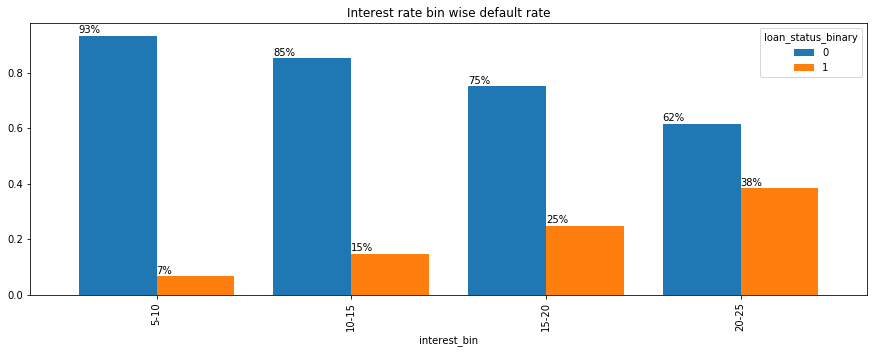

In [53]:
#Default rate based on the interest rate 
df=loan.groupby(['interest_bin','loan_status_binary']).size()
df=df.unstack()
ax = (df.div(df.sum(1), axis=0)).plot(kind='bar',figsize=(15,5),width = 0.8,edgecolor=None)
plt.title('Interest rate bin wise default rate')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
#Note:The Percentage above the bar shows the default rate
#As there is increase in the interest rate there is a high chances of default.

In [54]:
#Calculating default rate on emp_title 
df_emp_title = loan.groupby(['emp_title', 'loan_status_binary']).size().reset_index(name='counts').sort_values(['counts','emp_title'], ascending = False)
#As there are more then 26703 unique emp_title we have done the analysis with the DF

In [55]:
#Here we moved count of fully paid
df_emp_fullypaid = df_emp_title[df_emp_title.loan_status_binary == 0]
#Here we moved count of charged off
df_emp_chargedof = df_emp_title[df_emp_title.loan_status_binary == 1]

In [56]:
#Created a new DF by merging both the DF
df_emp_default = pd.DataFrame( pd.merge(df_emp_fullypaid,df_emp_chargedof, on = 'emp_title', how = 'outer'))
df_emp_default 

,emp_title,loan_status_binary_x,counts_x,loan_status_binary_y,counts_y
0,US ARMY,0.0,2078.0,1.0,514.0
1,BANK OF AMERICA,0.0,108.0,1.0,24.0
2,AT&T,0.0,61.0,1.0,16.0
3,KAISER PERMANENTE,0.0,60.0,1.0,8.0
4,WALMART,0.0,58.0,1.0,20.0
5,IBM,0.0,58.0,1.0,9.0
6,WELLS FARGO,0.0,57.0,1.0,8.0
7,USAF,0.0,52.0,1.0,2.0
8,SELF,0.0,52.0,1.0,8.0
9,VERIZON WIRELESS,0.0,51.0,1.0,13.0


In [57]:
#Created a default column
df_emp_default['default'] = df_emp_default.apply( lambda row : round(row['counts_y'] / ( row['counts_x'] + row['counts_y'] ),2) , axis = 1 )
#Created a sum of count
df_emp_default['sum_count'] = df_emp_default.apply( lambda row : ( row['counts_x'] + row['counts_y'] ), axis = 1 )

In [58]:
#Below are emp_tile where the highest loans have been taken and there is high default
df_emp_default.sort_values(['sum_count','default'], ascending = False).head(100)

,emp_title,loan_status_binary_x,counts_x,loan_status_binary_y,counts_y,default,sum_count
0,US ARMY,0.0,2078.0,1.0,514.0,0.20,2592.0
1,BANK OF AMERICA,0.0,108.0,1.0,24.0,0.18,132.0
4,WALMART,0.0,58.0,1.0,20.0,0.26,78.0
2,AT&T,0.0,61.0,1.0,16.0,0.21,77.0
3,KAISER PERMANENTE,0.0,60.0,1.0,8.0,0.12,68.0
5,IBM,0.0,58.0,1.0,9.0,0.13,67.0
6,WELLS FARGO,0.0,57.0,1.0,8.0,0.12,65.0
9,VERIZON WIRELESS,0.0,51.0,1.0,13.0,0.20,64.0
13,UPS,0.0,45.0,1.0,17.0,0.27,62.0
8,SELF,0.0,52.0,1.0,8.0,0.13,60.0


In [59]:
#Below are emp_tile where the highest loans have been taken and there is high default
df_emp_default.sort_values(['default'], ascending = False).head(100)

,emp_title,loan_status_binary_x,counts_x,loan_status_binary_y,counts_y,default,sum_count
12817,LEVEL 3 COMMUNICATIONS,0.0,1.0,1.0,4.0,0.80,5.0
17462,DYNCORP INTERNATIONAL,0.0,1.0,1.0,3.0,0.75,4.0
22954,ABERCROMBIE & FITCH,0.0,1.0,1.0,3.0,0.75,4.0
4504,UNITED NATIONS,0.0,1.0,1.0,3.0,0.75,4.0
10427,NOVARTIS PHARMACEUTICALS,0.0,1.0,1.0,2.0,0.67,3.0
18171,DCH AUTO GROUP,0.0,1.0,1.0,2.0,0.67,3.0
10675,NEWMARK KNIGHT FRANK,0.0,1.0,1.0,2.0,0.67,3.0
4870,TRINET,0.0,1.0,1.0,2.0,0.67,3.0
7457,SECURITAS SECURITY,0.0,1.0,1.0,2.0,0.67,3.0
14810,HMS HOST,0.0,1.0,1.0,2.0,0.67,3.0


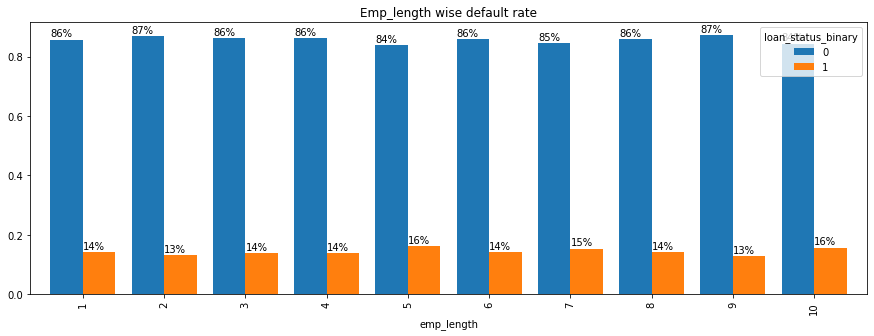

In [60]:
#Default Rate with emp_length
df=loan.groupby(['emp_length','loan_status_binary']).size()
df=df.unstack()
ax = (df.div(df.sum(1), axis=0)).plot(kind='bar',figsize=(15,5),width = 0.8,edgecolor=None)
plt.title('Emp_length wise default rate')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
#Note:The Percentage above the bar shows the default rate

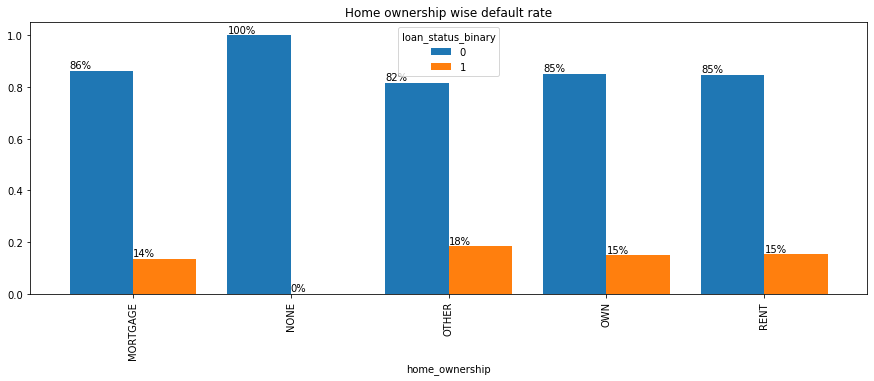

In [61]:
#Default_rate with home_ownership
df=loan.groupby(['home_ownership','loan_status_binary']).size()
df=df.unstack()
ax = (df.div(df.sum(1), axis=0)).plot(kind='bar',figsize=(15,5),width = 0.8,edgecolor=None)
plt.title('Home ownership wise default rate')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
#Note:The Percentage above the bar shows the default rate
#As per the below other home_ownership has slightly high default rate

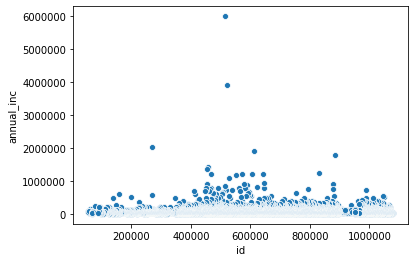

In [62]:
#Finding outliers to create bins for annual income
sns.scatterplot(loan['id'],loan['annual_inc'])

In [63]:
#Creating Bins for annual Income by 25000 Range
loan['annual_inc_bin'] = pd.cut(loan['annual_inc'], [0,25000,50000,75000,100000,np.inf], labels=['0-25000', '25000-50000','50001-75000', '75001-100000','>100000'])
loan['annual_inc_bin']
#Categroised all the above 1 million into one bin

0             0-25000
1         25000-50000
2             0-25000
3         25000-50000
5         25000-50000
6         25000-50000
7         25000-50000
8         25000-50000
9             0-25000
10        50001-75000
11        50001-75000
12        25000-50000
13            0-25000
14       75001-100000
15        25000-50000
16        25000-50000
17            >100000
18       75001-100000
19       75001-100000
20        25000-50000
21            >100000
22        25000-50000
23        25000-50000
24       75001-100000
25       75001-100000
26        50001-75000
27        50001-75000
28            >100000
29            0-25000
30            0-25000
31        50001-75000
33            0-25000
34        25000-50000
35        25000-50000
36        50001-75000
37        25000-50000
38        25000-50000
40        50001-75000
41        50001-75000
42        50001-75000
43        50001-75000
44        25000-50000
45       75001-100000
46       75001-100000
47        25000-50000
48        

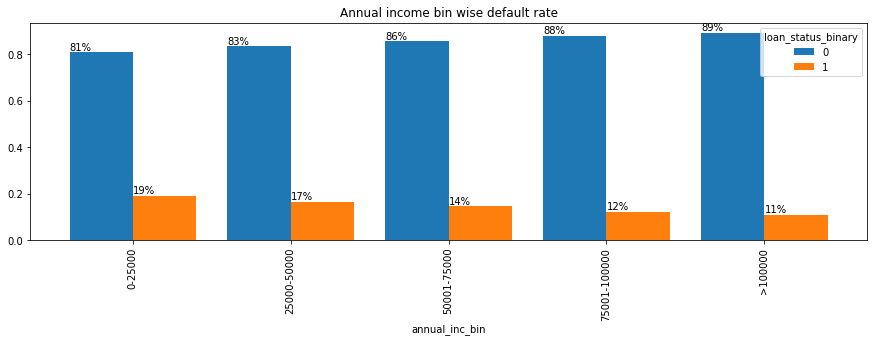

In [64]:
#Default rate for the annual income
df=loan.groupby(['annual_inc_bin', 'loan_status_binary']).size()
df=df.unstack()
ax = (df.div(df.sum(1), axis=0)).plot(kind='bar',figsize=(15,4),width = 0.8,edgecolor=None)
plt.title('Annual income bin wise default rate')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
#Note:The Percentage above the bar shows the default rate
#As per the below plot the default rate is high on the low incomes

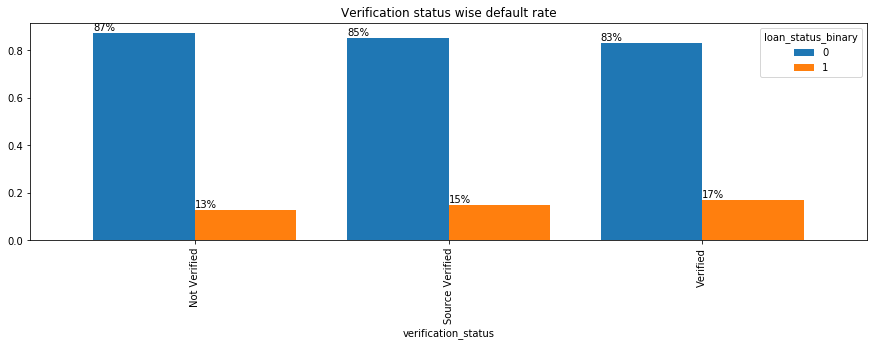

In [65]:
#Default Rate for verification status
df=loan.groupby(['verification_status', 'loan_status_binary']).size()
df=df.unstack()
ax = (df.div(df.sum(1), axis=0)).plot(kind='bar',figsize=(15,4),width = 0.8,edgecolor=None)
plt.title('Verification status wise default rate')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
#Note:The Percentage above the bar shows the default rate
#It's surprising that not verified has less default rate and verified as high default rate

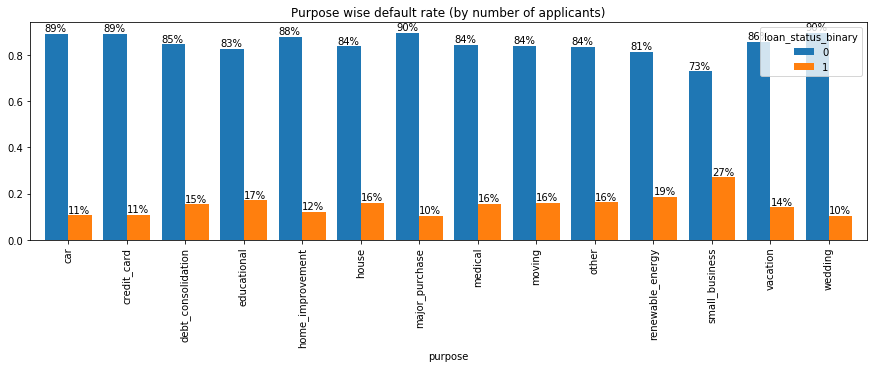

In [66]:
#Default Rate for purpose
df=loan.groupby(['purpose', 'loan_status_binary']).size()
df=df.unstack()
ax = (df.div(df.sum(1), axis=0)).plot(kind='bar',figsize=(15,4),width = 0.8,edgecolor=None)
plt.title('Purpose wise default rate (by number of applicants)')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
#Note:The Percentage above the bar shows the default rate
#By the below bar plot we can see there is a high default rate in Small_business followed by renewable_energy

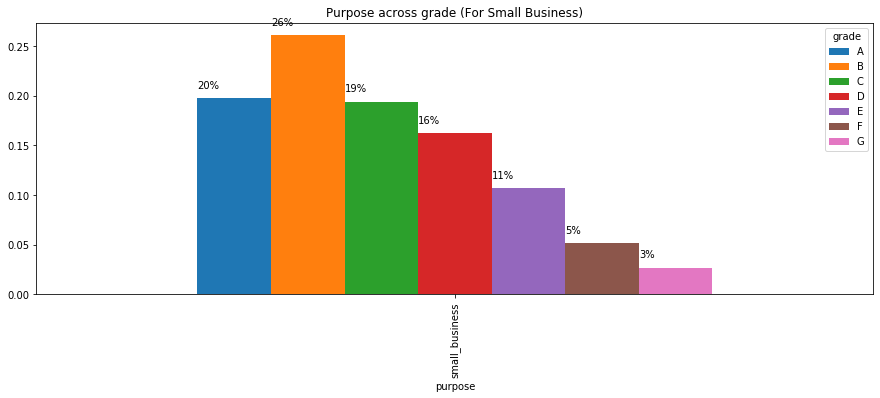

In [67]:
#Checking relation between purpose (Small business) and grade
df=loan[loan.purpose =="small_business"].groupby(['purpose','grade']).size()
df=df.unstack()
ax = (df.div(df.sum(1), axis=0)).plot(kind='bar',figsize=(15,5),width = 0.8,edgecolor=None)
plt.title('Purpose across grade (For Small Business)')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

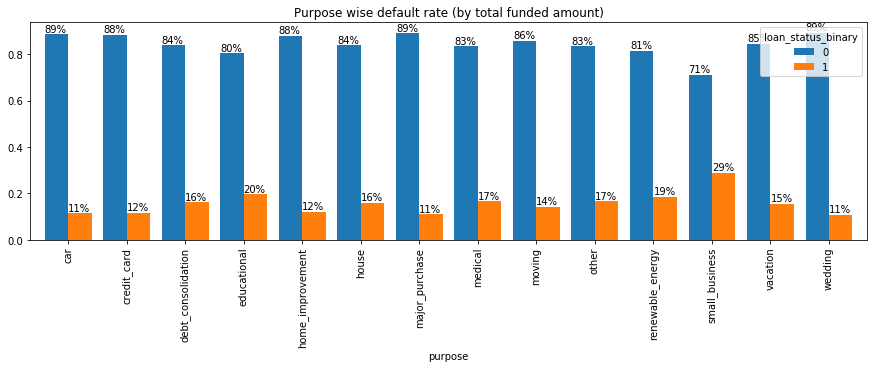

In [68]:
#Default Rate for purpose with value of amount
df=loan.groupby(['purpose', 'loan_status_binary'])['funded_amnt_inv'].sum()
df=df.unstack()
ax = (df.div(df.sum(1), axis=0)).plot(kind='bar',figsize=(15,4),width = 0.8,edgecolor=None)
plt.title('Purpose wise default rate (by total funded amount)')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
#Note:The Percentage above the bar shows the default rate
#By the below bar plot we can see a difference in the high default rate purpose i.e. in educational
#As per the value of amount there is a high default rate in small_business followed by educational

In [69]:
#Creating bin for DTI
loan['dti_bin'] = pd.cut(loan['dti'], [0,10,20,30], labels=['0-10', '10-20','20-30'])
loan['dti_bin']

0        20-30
1         0-10
2         0-10
3        10-20
5        10-20
6        20-30
7         0-10
8         0-10
9        10-20
10       10-20
11       10-20
12       10-20
13       10-20
14        0-10
15       20-30
16       10-20
17       10-20
18       10-20
19        0-10
20       20-30
21       10-20
22       10-20
23       10-20
24        0-10
25       20-30
26       10-20
27       10-20
28        0-10
29       10-20
30       20-30
31       10-20
33       10-20
34        0-10
35       10-20
36        0-10
37        0-10
38       10-20
40        0-10
41       10-20
42       10-20
43       20-30
44        0-10
45        0-10
46       10-20
47       10-20
48       10-20
49       10-20
50        0-10
51       10-20
52        0-10
53       20-30
54        0-10
55       20-30
56       20-30
57       10-20
58       10-20
59       20-30
60       10-20
61       10-20
62       10-20
63       20-30
64       20-30
65        0-10
66       10-20
67       20-30
68       10-20
69       1

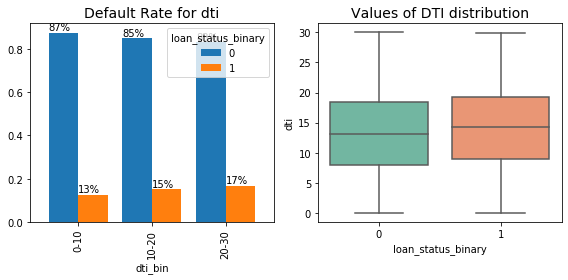

In [70]:
f,((ax1, ax2)) = plt.subplots(1, 2)
df=loan[loan.loan_status != 'Current'].groupby(['dti_bin', 'loan_status_binary']).size()
df=df.unstack()
ax = (df.div(df.sum(1), axis=0)).plot(kind='bar', ax= ax1, figsize=(8,4),width = 0.8,edgecolor=None)
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
ax1.set_title('Default Rate for dti', fontsize=14)


ax2 = sns.boxplot(x="loan_status_binary", y="dti", data=loan, palette="Set2" )
ax2.set_title('Values of DTI distribution', fontsize=14)
f.tight_layout() 
#From the below two subplots we can see that Default rate is high in the 20-30 bin of DTI
#Most of the application for charged off and fully paid is distributed between 10-20

In [71]:
#creating zip_code bins to find default rate
loan['zip_bin'] = pd.cut(loan['zip_code'], [0,100,200,300,400,500,600,700,800,900,1000], labels=['0-100', '101-200','201-300','301-400','401-500','501-600','601-700','701-800','801-900','901-1000'])

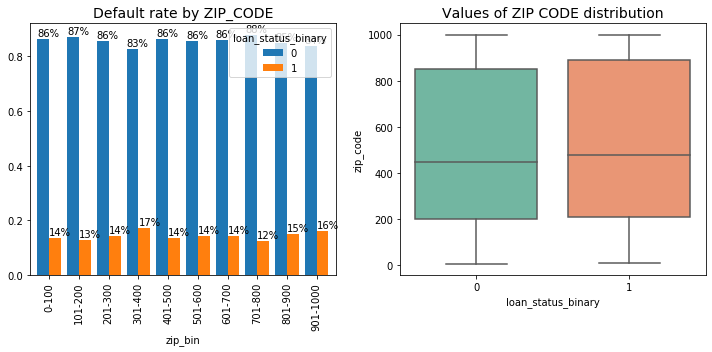

In [72]:
#Default rate and distiribution of ZIP_Code
f,((ax1, ax2)) = plt.subplots(1, 2)
df=loan.groupby(['zip_bin', 'loan_status_binary']).size() 
df=df.unstack() 
ax = (df.div(df.sum(1), axis=0)).plot(kind='bar', ax= ax1, figsize=(10,5),width = 0.8,edgecolor=None)
ax1.set_title('Default rate by ZIP_CODE', fontsize=14)
for p in ax1.patches: 
    width, height = p.get_width(), p.get_height() 
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
ax2 = sns.boxplot(x="loan_status_binary", y="zip_code", data=loan, palette="Set2" ) 
ax2.set_title('Values of ZIP CODE distribution', fontsize=14) 
f.tight_layout()
#Note:The Percentage above the bar shows the default rate
#We can see from below bar chart 301-400 zip codes are having more default rate
#Most of distribution lies between 200-800

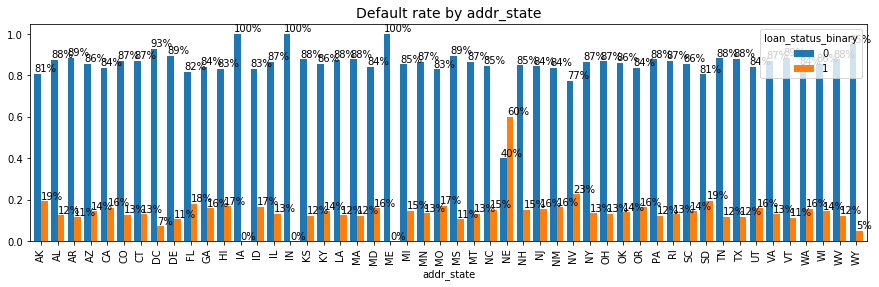

In [73]:
#State wise default rate
df=loan.groupby(['addr_state', 'loan_status_binary']).size() 
df=df.unstack() 
ax = (df.div(df.sum(1), axis=0)).plot(kind='bar', figsize=(15,4),width = 0.8,edgecolor=None)
ax.set_title('Default rate by addr_state', fontsize=14)
for p in ax.patches: 
    width, height = p.get_width(), p.get_height() 
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
#Note:The Percentage above the bar shows the default rate
#From the below plot we can see that NE has the most cases of default

In [74]:
#Distribution of pub_rec_bankruptcies 
loan.groupby(['pub_rec_bankruptcies', 'loan_status_binary']).size()
#As from the below we can see that where the bankruptcies is high the loans are very low and those who get are likely to default

pub_rec_bankruptcies  loan_status_binary
0.0                   0                     31676
                      1                      5259
1.0                   0                      1271
                      1                       366
2.0                   0                         3
                      1                         2
dtype: int64

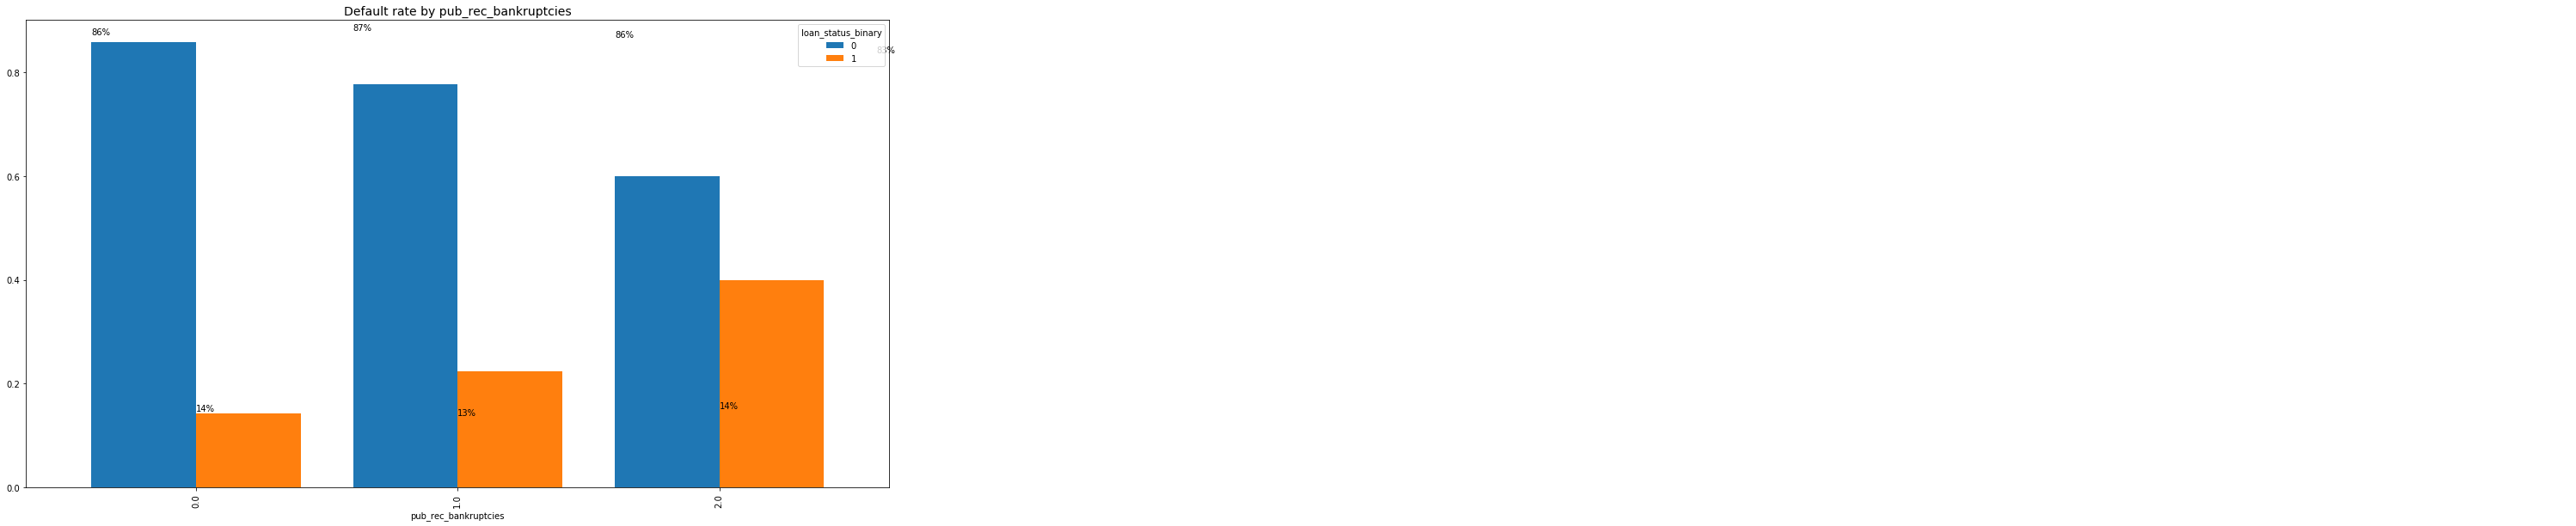

In [75]:
# Default rate with pub_rec_bankruptcies 

df=loan.groupby(['pub_rec_bankruptcies', 'loan_status_binary']).size() 
df=df.unstack() 
ax = (df.div(df.sum(1), axis=0)).plot(kind='bar', figsize=(18,10),width = 0.8,edgecolor=None)
ax.set_title('Default rate by pub_rec_bankruptcies', fontsize=14)
for p in ax1.patches: 
    width, height = p.get_width(), p.get_height() 
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
    
#Note:The Percentage above the bar shows the default rate
#From the below plot its clear where the applicant has 2 bankruptcies record is more likely to default.